#The Task

You're interested in understanding the behaviour of contributors on https://stackoverflow.com/ (SO). For this analysis, you first need to:
1. obtain the SO posts, i.e., questions and their answers, for a given tag (e.g., “wordpress”) within a given time period (e.g., "01/2021-06/2021")
2. extract for each post 5 important metrics (up to you to choose and motivate)
3. generate a csv file with one line per post, where each line contains an identifier for a post and the values for the 5 chosen metrics

Then, perform an initial analysis where you obtain the csv file for two tags (e.g., “wordpress” and “drupal”) within a 6-month period (e.g., "01/2021-06/2021”). You should:
1. generate plots to understand the differences in distribution of the 5 metrics between the posts of the two tags
2. add an additional type of analysis that could provide better understanding of differences in behaviour between the posts of the two tags

You can use any programming language, library, etc. that you desire. You just need to use a private GitHub repository to develop your code, tests, a README file explaining any design choices (e.g., the 5 metrics) and assumptions, the analyses used, as well as discussing the results of your analyses. Please also add the obtained csv files. Finally, don't forget to clearly comment the code and provide access to your GitHub repository to user "bramadams".

I am getting the posts from https://www.kaggle.com/stackoverflow/stackoverflow?select=posts_questions , and I will be selecting posts in between a 6 month period for the 2 tags I have selected (reactjs and vuejs).

#Step 1

I looked through the columns in the stackover flow posts table and shortlisted 5 columns other than the ID (primary key) that would be helpful in doing data analysis. These were: answer_count, comment_count,creation_date,score, view_count

#Step 2

I first wrote an SQL query through the google BigQuery platform 
(https://console.cloud.google.com/bigquery?project=stack-overflow-analysis-343407&d=stackoverflow&p=bigquery-public-data&t=stackoverflow_posts&page=table&ws=!1m10!1m4!1m3!1sstack-overflow-analysis-343407!2sbquxjob_778569bb_17f741986a5!3sUS!1m4!4m3!1sbigquery-public-data!2sstackoverflow!3sstackoverflow_posts)

For just ReactJS:
```
SELECT id, answer_count, comment_count,creation_date,score, view_count 
FROM `bigquery-public-data.stackoverflow.posts_*` 
WHERE creation_date BETWEEN '2021-06-01 00:00:00' AND '2021-12-01 23:59:59' 
AND tags LIKE "%reactjs%"
```
For just VueJS:
```
SELECT id, answer_count, comment_count,creation_date,score, view_count 
FROM `bigquery-public-data.stackoverflow.posts_*` 
WHERE creation_date BETWEEN '2021-06-01 00:00:00' AND '2021-12-01 23:59:59' 
AND tags LIKE "%vuejs%"
```
For a mix of both:
```
SELECT id, answer_count, comment_count,creation_date,score, view_count, tags
FROM `bigquery-public-data.stackoverflow.posts_*` 
WHERE creation_date BETWEEN '2021-06-01 00:00:00' AND '2021-12-01 23:59:59' 
AND (tags LIKE "%reactjs%" OR tags LIKE "%vuejs%")
```
I got 6 months of Data from the posts table as a CSV which I downloaded to then analyze in this notebook.

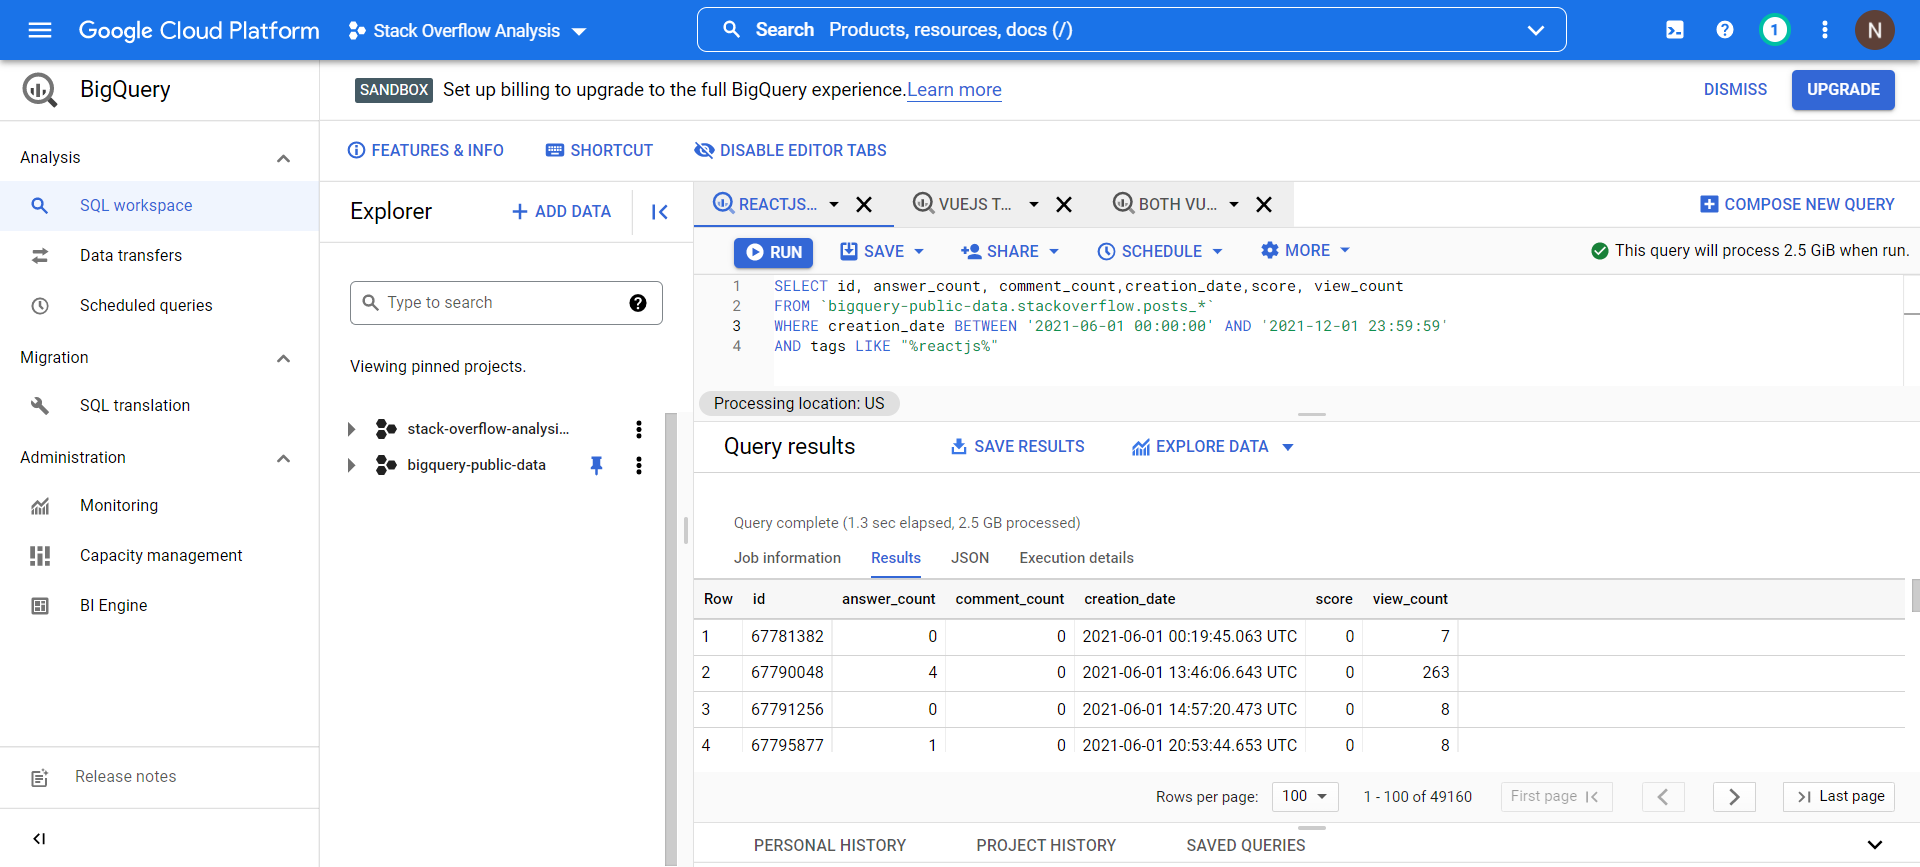

#Step 3: Importing CSVs to the notebook


I downloaded the CSV files for:
1. Just the posts that included the tag "reactjs" (2,202KB)
2. Just the posts that included the tag "vuejs" (156KB)
3. All the posts with tags that include either "vuejs" or "reactjs" (4011KB)

In [6]:
import pandas as pd

In [21]:
# Importing CSV from github, only works with 1 csv at a time because the repository is private
url_reactjs_and_vuejs = 'https://raw.githubusercontent.com/NomiPeaceMaker/StackOverflowAnalysis4Queens/main/Both%20ReactJS%20and%20VueJS.csv?token=GHSAT0AAAAAABSG6VO2ZZXC4MG2ZJHRBQGKYRQVBIQ'
# url_reactjs = 'https://raw.githubusercontent.com/NomiPeaceMaker/StackOverflowAnalysis4Queens/main/ReactJS%20only.csv?token=GHSAT0AAAAAABSG6VO23J5R3COIKRAPSHH2YRQU44A'
# url_vuejs = 'https://raw.githubusercontent.com/NomiPeaceMaker/StackOverflowAnalysis4Queens/main/VueJS%20only.csv?token=GHSAT0AAAAAABSG6VO335LMX7SB5ZIFRIO6YRQU5UQ'
df1 = pd.read_csv(url_reactjs_and_vuejs) # For both
# df2 = pd.read_csv(url_reactjs) # For ReactJS
# df3 = pd.read_csv(url_vuejs) # For VueJS

In [7]:
#importing from local drive
from google.colab import files
uploaded = files.upload()

Saving VueJS only.csv to VueJS only.csv
Saving ReactJS only.csv to ReactJS only.csv


In [8]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['ReactJS only.csv']))
df3 = pd.read_csv(io.BytesIO(uploaded['VueJS only.csv']))

In [23]:
df1.columns

Index(['id', 'answer_count', 'comment_count', 'creation_date', 'score',
       'view_count', 'tags'],
      dtype='object')

#Step 4. Initial Analysis

I ran the .describe() function on all 3 datasets to get basic information about count, min, max, distribution and averages.

In [24]:
df1.describe()

,id,answer_count,comment_count,score,view_count
count,5.262300e+04,52623.000000,52623.000000,52623.000000,52623.000000
mean,6.900622e+07,0.880908,1.458982,0.302966,94.726716
std,6.976321e+05,0.861009,2.213952,1.253453,759.593385
min,6.778132e+07,0.000000,0.000000,-10.000000,3.000000
25%,6.840584e+07,0.000000,0.000000,0.000000,26.000000
50%,6.900862e+07,1.000000,1.000000,0.000000,39.000000
75%,6.961393e+07,1.000000,2.000000,1.000000,65.000000
max,7.019268e+07,14.000000,29.000000,127.000000,120813.000000


In [41]:
df2.describe()

,id,answer_count,comment_count,score,view_count
count,4.916000e+04,49160.000000,49160.000000,49160.000000,49160.000000
mean,6.900640e+07,0.883198,1.478011,0.297600,94.045098
std,6.982011e+05,0.868630,2.233944,1.276738,782.841631
min,6.778132e+07,0.000000,0.000000,-10.000000,3.000000
25%,6.840745e+07,0.000000,0.000000,0.000000,26.000000
50%,6.900976e+07,1.000000,1.000000,0.000000,39.000000
75%,6.961468e+07,1.000000,2.000000,1.000000,64.000000
max,7.019268e+07,14.000000,29.000000,127.000000,120813.000000


In [42]:
df3.describe()

,id,answer_count,comment_count,score,view_count
count,3.471000e+03,3471.000000,3471.000000,3471.000000,3471.000000
mean,6.900346e+07,0.848747,1.187266,0.380006,104.813022
std,6.898184e+05,0.743772,1.885809,0.853501,261.690329
min,6.778216e+07,0.000000,0.000000,-3.000000,4.000000
25%,6.838398e+07,0.000000,0.000000,0.000000,26.000000
50%,6.899936e+07,1.000000,0.000000,0.000000,41.000000
75%,6.959953e+07,1.000000,2.000000,1.000000,81.000000
max,7.019159e+07,5.000000,15.000000,11.000000,7896.000000


The describe functions immediately give us an understanding that ReactJS is more popular than VueJS. Garnering an overall greater number of answers, comments, views and range of scores due to the greater number of voters.

It is important to get an understanding of the correlation of the metrics amongst eachother. A very high correlation may signal that a metric is directly/inversely proportional and is strongly linked to another metric. This would cause the metric to be useless when analysing our results.

In [20]:
corrMatrixReact = df2.corr()
corrMatrixReact

,id,answer_count,comment_count,score,view_count
id,1.000000,-0.034796,-0.006504,-0.032494,-0.036250
answer_count,-0.034796,1.000000,0.015145,0.152754,0.142583
comment_count,-0.006504,0.015145,1.000000,0.001303,0.018571
score,-0.032494,0.152754,0.001303,1.000000,0.462284
view_count,-0.036250,0.142583,0.018571,0.462284,1.000000


In [21]:
corrMatrixVue = df3.corr()
corrMatrixVue

,id,answer_count,comment_count,score,view_count
id,1.000000,-0.045255,0.012587,-0.009114,-0.206259
answer_count,-0.045255,1.000000,-0.024385,0.193165,0.213903
comment_count,0.012587,-0.024385,1.000000,0.008773,0.014265
score,-0.009114,0.193165,0.008773,1.000000,0.284021
view_count,-0.206259,0.213903,0.014265,0.284021,1.000000


From the correlation matrix we can see that none of the metrics are strongly correlated. There seems to be a weak correlation between score and view_count. Moreso for the data for ReactJS than for VueJS.

I will now generate a scatter plot of the view count to get a better understanding of the spread and distribution of the vue + react data. I suspect view count to be to some extent correlated to the other values so should give an idea of posts that got the most attention and how common it was.

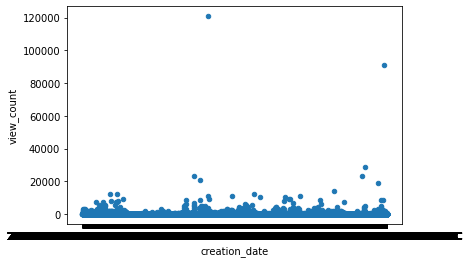

In [25]:
df1.plot(x ='creation_date', y='view_count', kind = 'scatter')

Most values are around the mean (~95) whereas there are only 7 outliers above the 20000 mark. I assume that older posts would have a greater number of views but it seems as though I may be wrong when the plot is viewed at this scale, zooming in would reveal useful information. The number of views are evenly spread out with a few newer posts having a greater number of views.

I then decided to aggregate the data to show the number of posts created per day as a count to measure the popularity of the framework with time.

In [9]:
s2 = pd.to_datetime(df2['creation_date'])
df21 = s2.groupby(s2.dt.floor('d')).size().reset_index(name='count')
print(df21)

                creation_date  count
0   2021-06-01 00:00:00+00:00    302
1   2021-06-02 00:00:00+00:00    342
2   2021-06-03 00:00:00+00:00    290
3   2021-06-04 00:00:00+00:00    271
4   2021-06-05 00:00:00+00:00    207
..                        ...    ...
179 2021-11-27 00:00:00+00:00    207
180 2021-11-28 00:00:00+00:00    218
181 2021-11-29 00:00:00+00:00    352
182 2021-11-30 00:00:00+00:00    348
183 2021-12-01 00:00:00+00:00    344

[184 rows x 2 columns]


In [10]:
s3 = pd.to_datetime(df3['creation_date'])
df31 = s3.groupby(s3.dt.floor('d')).size().reset_index(name='count')
print(df31)

                creation_date  count
0   2021-06-01 00:00:00+00:00     20
1   2021-06-02 00:00:00+00:00     16
2   2021-06-03 00:00:00+00:00     15
3   2021-06-04 00:00:00+00:00     18
4   2021-06-05 00:00:00+00:00      8
..                        ...    ...
179 2021-11-27 00:00:00+00:00      7
180 2021-11-28 00:00:00+00:00     23
181 2021-11-29 00:00:00+00:00     24
182 2021-11-30 00:00:00+00:00     19
183 2021-12-01 00:00:00+00:00     24

[184 rows x 2 columns]


#5. Plots

This plot shows us the day to day comparison between VueJS and ReactJS with the number of posts.

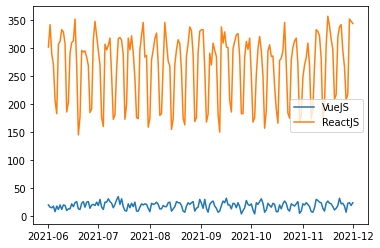

In [17]:
import matplotlib.pyplot as plt
plt.plot(df31['creation_date'], df31['count'], label='VueJS')
plt.plot(df21['creation_date'], df21['count'], label='ReactJS')
plt.legend()

ReactJS has a much greater average number of new posts and also has a greater range between minimum and maximum new posts in a day. The sharp peaks and troughs are likely due to the fact that more posts are created during the weakdays than weekends as there are approximately 4 peaks and troughs in each one month period.

In [76]:
df21['dayoftheweek'] = df21['creation_date'].dt.dayofweek
aggOfdf2days = df21.groupby(df21.dayoftheweek).agg({'count': 'sum'}).reset_index()
# 0 is Monday, 6 is Sunday
df31['dayoftheweek'] = df31['creation_date'].dt.dayofweek
aggOfdf3days = df31.groupby(df31.dayoftheweek).agg({'count': 'sum'}).reset_index()

Text(0.5, 1.0, 'Number of posts made by days of the week for ReactJS')

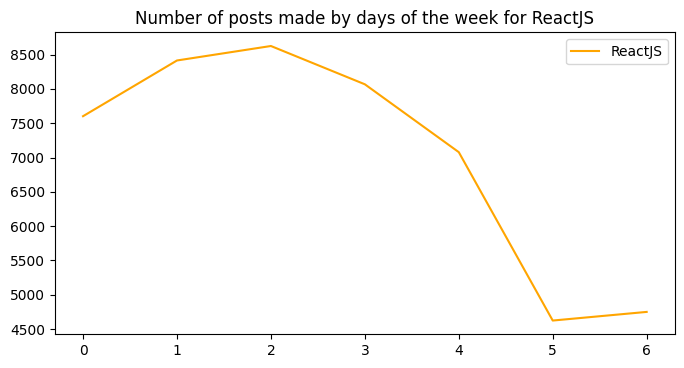

In [84]:
# 0 is Monday, 6 is Sunday
figure(figsize=(8, 4), dpi=100)
plt.plot(aggOfdf2days['dayoftheweek'], aggOfdf2days['count'], label='ReactJS', color='orange')
plt.legend()
plt.title("Number of posts made by days of the week for ReactJS")

Text(0.5, 1.0, 'Number of posts made by days of the week for VueJS')

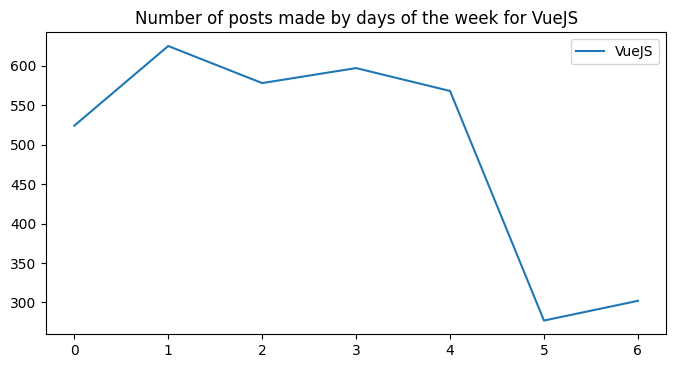

In [83]:
# 0 is Monday, 6 is Sunday
figure(figsize=(8, 4), dpi=100)
plt.plot(aggOfdf3days['dayoftheweek'], aggOfdf3days['count'], label='VueJS')
plt.legend()
plt.title("Number of posts made by days of the week for VueJS")

My weekday hypothesis has been proven to be correct. Number of new posts created for both VueJS and ReactJS are are lesser on the weekends. With the highest number of posts in the middle of the week between Tuesday and Wednesday and the lowest number of posts on Saturday.

Because plotting graphs for the entire dataset is difficult as it requires greater compute and time, I decided to aggregate the data of each metric by sum and mean by each day to be compared between vuejs and reactjs.

This reduced the number of rows to 183 as there are 183 days in the 6 month time period.

In [28]:
aggOfdf2 = df2.groupby(pd.to_datetime(df2.creation_date).dt.date).agg({'answer_count': 'sum', 'comment_count':'sum', 'score':'sum', 'view_count':'sum'}).reset_index()
aggOfdf2

,creation_date,answer_count,comment_count,score,view_count
0,2021-06-01,267,499,97,36312
1,2021-06-02,307,510,93,41238
2,2021-06-03,279,475,82,31163
3,2021-06-04,238,416,84,37957
4,2021-06-05,220,296,95,36301
...,...,...,...,...,...
179,2021-11-27,157,291,38,6301
180,2021-11-28,179,275,2,6616
181,2021-11-29,260,476,33,9491
182,2021-11-30,252,498,15,10141


In [33]:
aggOfdf2_mean = df2.groupby(pd.to_datetime(df2.creation_date).dt.date).agg({'answer_count': 'mean', 'comment_count':'mean', 'score':'mean', 'view_count':'mean'}).reset_index()
aggOfdf2_mean

,creation_date,answer_count,comment_count,score,view_count
0,2021-06-01,0.884106,1.652318,0.321192,120.238411
1,2021-06-02,0.897661,1.491228,0.271930,120.578947
2,2021-06-03,0.962069,1.637931,0.282759,107.458621
3,2021-06-04,0.878229,1.535055,0.309963,140.062731
4,2021-06-05,1.062802,1.429952,0.458937,175.367150
...,...,...,...,...,...
179,2021-11-27,0.758454,1.405797,0.183575,30.439614
180,2021-11-28,0.821101,1.261468,0.009174,30.348624
181,2021-11-29,0.738636,1.352273,0.093750,26.963068
182,2021-11-30,0.724138,1.431034,0.043103,29.140805


In [26]:
aggOfdf3 = df3.groupby(pd.to_datetime(df3.creation_date).dt.date).agg({'answer_count': 'sum', 'comment_count':'sum', 'score':'sum', 'view_count':'sum'}).reset_index()
aggOfdf3

,creation_date,answer_count,comment_count,score,view_count
0,2021-06-01,21,30,4,10387
1,2021-06-02,20,20,15,6866
2,2021-06-03,13,23,3,2117
3,2021-06-04,14,16,7,3292
4,2021-06-05,10,6,1,1972
...,...,...,...,...,...
179,2021-11-27,8,5,4,301
180,2021-11-28,19,18,18,763
181,2021-11-29,11,23,7,589
182,2021-11-30,13,33,3,734


In [34]:
aggOfdf3_mean = df3.groupby(pd.to_datetime(df3.creation_date).dt.date).agg({'answer_count': 'mean', 'comment_count':'mean', 'score':'mean', 'view_count':'mean'}).reset_index()
aggOfdf3_mean

,creation_date,answer_count,comment_count,score,view_count
0,2021-06-01,1.050000,1.500000,0.200000,519.350000
1,2021-06-02,1.250000,1.250000,0.937500,429.125000
2,2021-06-03,0.866667,1.533333,0.200000,141.133333
3,2021-06-04,0.777778,0.888889,0.388889,182.888889
4,2021-06-05,1.250000,0.750000,0.125000,246.500000
...,...,...,...,...,...
179,2021-11-27,1.142857,0.714286,0.571429,43.000000
180,2021-11-28,0.826087,0.782609,0.782609,33.173913
181,2021-11-29,0.458333,0.958333,0.291667,24.541667
182,2021-11-30,0.684211,1.736842,0.157895,38.631579


Text(0.5, 1.0, 'daily sum of answer_count comparison with creation_date')

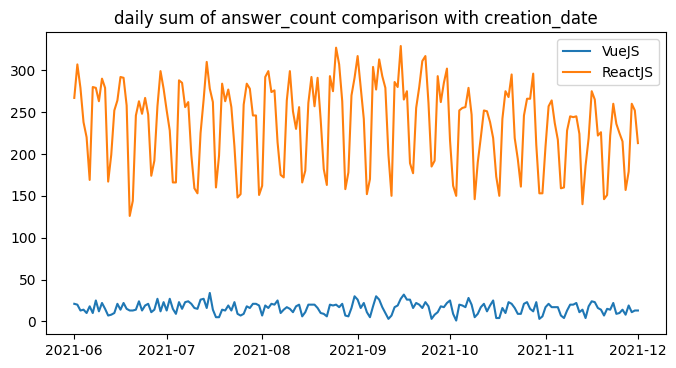

In [85]:
from matplotlib.pyplot import figure
figure(figsize=(8, 4), dpi=100)
plt.plot(aggOfdf3['creation_date'], aggOfdf3['answer_count'], label='VueJS')
plt.plot(aggOfdf2['creation_date'], aggOfdf2['answer_count'], label='ReactJS')
plt.legend()
plt.title("daily sum of answer_count comparison with creation_date")

This graph gives us an interesting pattern similar to the weekday patterns we saw in the previous graph. The day of post creation is correlated to the number of answers a post has gotten. We will confirm this by comparing the weekdays of post creation to the number of answers the posts got on average.

Text(0.5, 1.0, 'Number of answers recieved for ReactJS posts according to the day they were created')

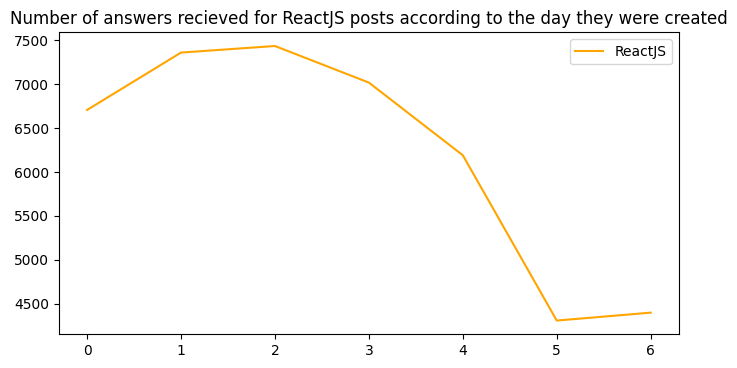

In [100]:
aggOfdf2['dayoftheweek'] = pd.to_datetime(aggOfdf2['creation_date']).dt.dayofweek
aggOfdf2days = aggOfdf2.groupby(aggOfdf2.dayoftheweek).agg({'answer_count': 'sum'}).reset_index()
figure(figsize=(8, 4), dpi=100)
plt.plot(aggOfdf2days['dayoftheweek'], aggOfdf2days['answer_count'], label='ReactJS', color='orange')
plt.legend()
plt.title("Number of answers recieved for ReactJS posts according to the day they were created")

Text(0.5, 1.0, 'Number of answers recieved for VueJS posts according to the day they were created')

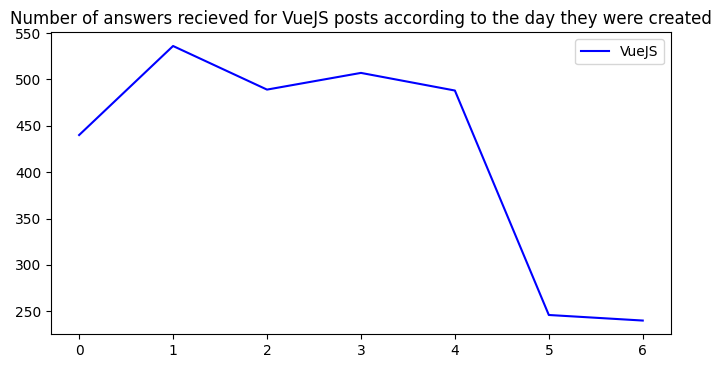

In [101]:
aggOfdf3['dayoftheweek'] = pd.to_datetime(aggOfdf3['creation_date']).dt.dayofweek
aggOfdf3days = aggOfdf3.groupby(aggOfdf3.dayoftheweek).agg({'answer_count': 'sum'}).reset_index()
figure(figsize=(8, 4), dpi=100)
plt.plot(aggOfdf3days['dayoftheweek'], aggOfdf3days['answer_count'], label='VueJS', color='blue')
plt.legend()
plt.title("Number of answers recieved for VueJS posts according to the day they were created")

This shows that ReactJS posts created on Wednesday are more likely to recieve answers than those made on other days. Similarly, VueJS posts made on Tuesday are more likely to recieve answers than those made on other days. The best time to make a post asking a question would be between Tuesday and Wednesday.

Text(0.5, 1.0, 'daily mean of answer_count comparison with creation_date')

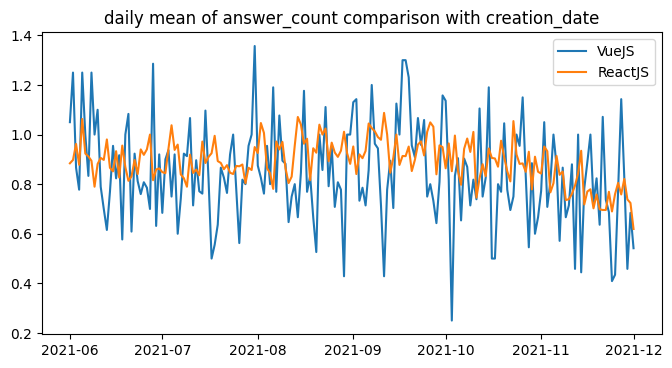

In [86]:
figure(figsize=(8, 4), dpi=100)
plt.plot(aggOfdf3_mean['creation_date'], aggOfdf3_mean['answer_count'], label='VueJS')
plt.plot(aggOfdf2_mean['creation_date'], aggOfdf2_mean['answer_count'], label='ReactJS')
plt.legend()
plt.title("daily mean of answer_count comparison with creation_date")

Text(0.5, 1.0, 'daily sum of comment_count comparison with creation_date')

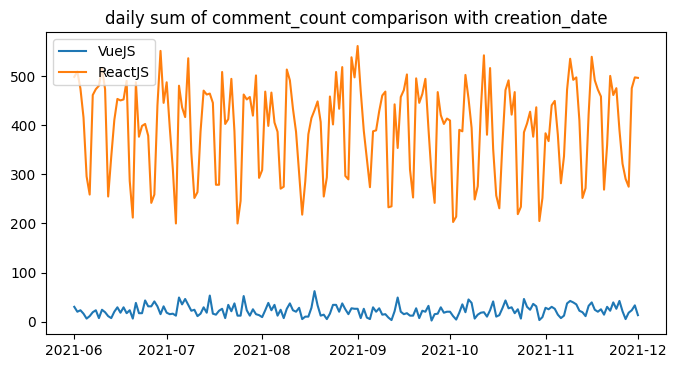

In [87]:
figure(figsize=(8, 4), dpi=100)
plt.plot(aggOfdf3['creation_date'], aggOfdf3['comment_count'], label='VueJS')
plt.plot(aggOfdf2['creation_date'], aggOfdf2['comment_count'], label='ReactJS')
plt.legend()
plt.title("daily sum of comment_count comparison with creation_date")

Text(0.5, 1.0, 'daily mean of comment_count comparison with creation_date')

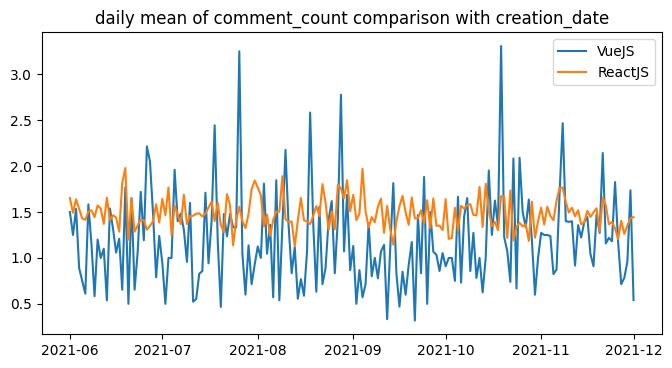

In [88]:
figure(figsize=(8, 4), dpi=100)
plt.plot(aggOfdf3_mean['creation_date'], aggOfdf3_mean['comment_count'], label='VueJS')
plt.plot(aggOfdf2_mean['creation_date'], aggOfdf2_mean['comment_count'], label='ReactJS')
plt.legend()
plt.title("daily mean of comment_count comparison with creation_date")

Text(0.5, 1.0, 'daily sum of score comparison with creation_date')

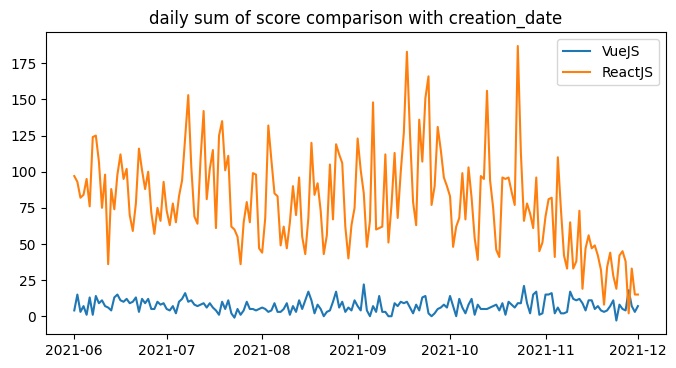

In [89]:
figure(figsize=(8, 4), dpi=100)
plt.plot(aggOfdf3['creation_date'], aggOfdf3['score'], label='VueJS')
plt.plot(aggOfdf2['creation_date'], aggOfdf2['score'], label='ReactJS')
plt.legend()
plt.title("daily sum of score comparison with creation_date")

Text(0.5, 1.0, 'daily mean of score comparison with creation_date')

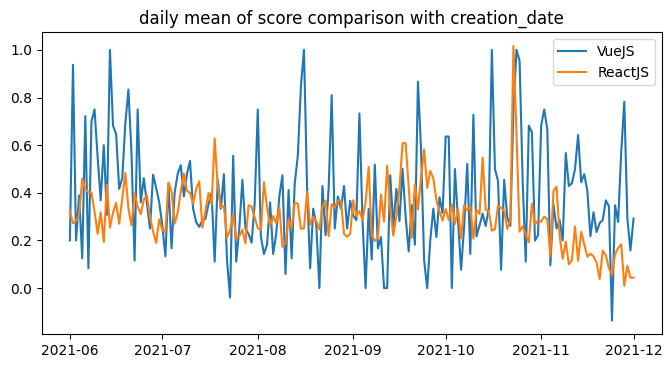

In [90]:
figure(figsize=(8, 4), dpi=100)
plt.plot(aggOfdf3_mean['creation_date'], aggOfdf3_mean['score'], label='VueJS')
plt.plot(aggOfdf2_mean['creation_date'], aggOfdf2_mean['score'], label='ReactJS')
plt.legend()
plt.title("daily mean of score comparison with creation_date")

Text(0.5, 1.0, 'daily sum of view_count comparison with creation_date')

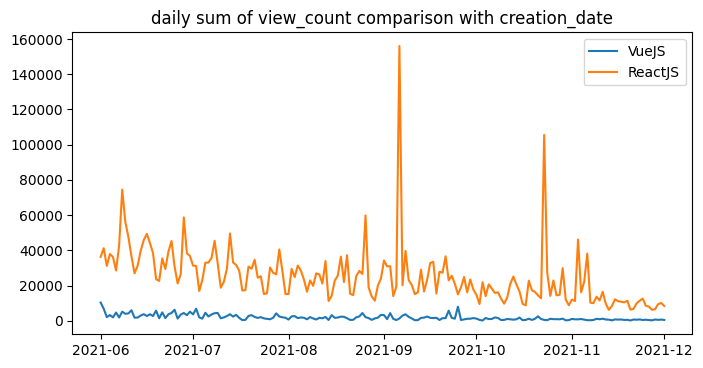

In [91]:
figure(figsize=(8, 4), dpi=100)
plt.plot(aggOfdf3['creation_date'], aggOfdf3['view_count'], label='VueJS')
plt.plot(aggOfdf2['creation_date'], aggOfdf2['view_count'], label='ReactJS')
plt.legend()
plt.title("daily sum of view_count comparison with creation_date")

Text(0.5, 1.0, 'daily mean of view_count comparison with creation_date')

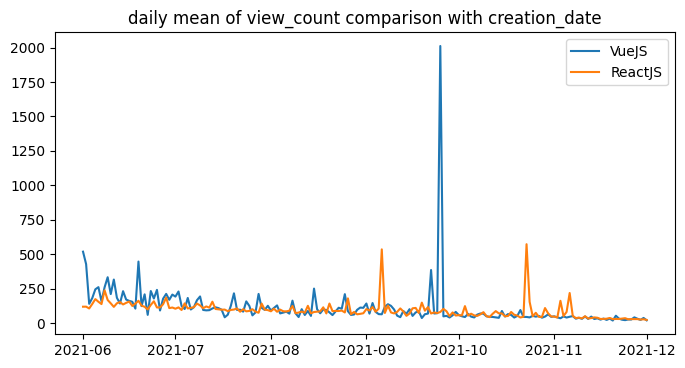

In [92]:
figure(figsize=(8, 4), dpi=100)
plt.plot(aggOfdf3_mean['creation_date'], aggOfdf3_mean['view_count'], label='VueJS')
plt.plot(aggOfdf2_mean['creation_date'], aggOfdf2_mean['view_count'], label='ReactJS')
plt.legend()
plt.title("daily mean of view_count comparison with creation_date")

#5.1 Checking By Time

All the above graphs show that there is a direct correlation between all metrics and the day on which the post was created. I will now check if there is a similar pattern in the time at which the posts are created.

Text(0.5, 1.0, 'Total number of posts at their respective creation hour')

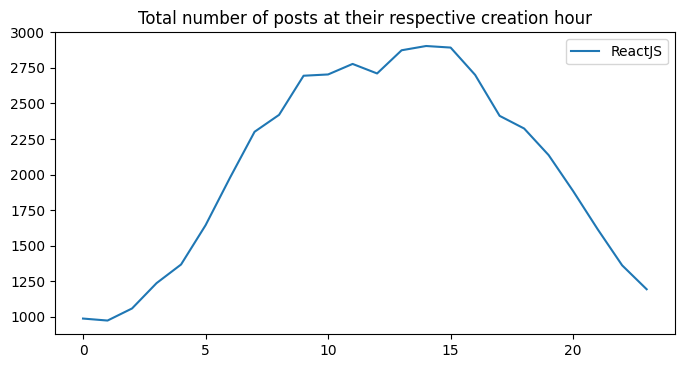

In [136]:
times = pd.to_datetime(df2.creation_date)
df2time = df2.groupby(times.dt.hour).size()
figure(figsize=(8, 4), dpi=100)
plt.plot(df2time.index,df2time, label='ReactJS')
plt.legend()
plt.title("Total number of posts at their respective creation hour")

In [137]:
df2time.describe()

count      24.000000
mean     2048.333333
std       683.765130
min       974.000000
25%      1366.500000
50%      2219.000000
75%      2701.750000
max      2904.000000
dtype: float64

This shows that a majority of posts were created between 7am and 7pm 

In [140]:
times = pd.to_datetime(df2.creation_date)
df2time = df2.groupby(times.dt.hour).answer_count.mean()

Text(0.5, 1.0, 'Average of answer_count per post comparison with creation hour')

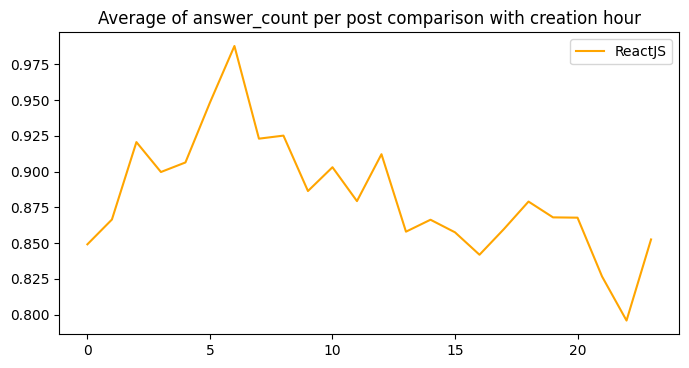

In [143]:
figure(figsize=(8, 4), dpi=100)
plt.plot(df2time.index,df2time, label='ReactJS', color='orange')
plt.legend()
plt.title("Average of answer_count per post comparison with creation hour")

This graph shows that posts created between 2am and 12pm on average get more answers. That makes 6am the best time to post.

Text(0.5, 1.0, 'Average of answer_count per post comparison with creation hour')

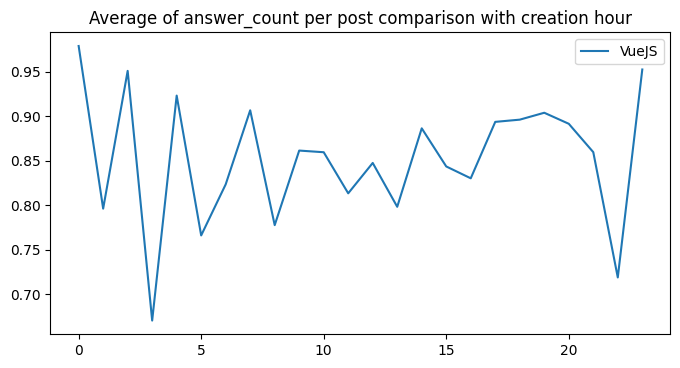

In [144]:
times = pd.to_datetime(df3.creation_date)
df3time = df3.groupby(times.dt.hour).answer_count.mean()
figure(figsize=(8, 4), dpi=100)
plt.plot(df2time.index,df3time, label='VueJS')
plt.legend()
plt.title("Average of answer_count per post comparison with creation hour")

#6. Results

We have learned from our Exploratory Data Analysis that the best day and time to post on stackoverflow to recieve an answer is around 6am on Wednesday for questions related to ReactJS and 12am on Tuesday for VueJS.

There is a correlation between the time and day a post is made to how many views, answers and comments it will get. Since the creation_date time information is according to UTC and assuming 10am-7pm is the average time a person is expected to be online and active: this shows that the most active timezone is approximately 5 hours behind UTC. This would make Easter Standard Time a prime candidate since it includes some of the largest population centers of North America.

#7. Additional type of analysis

Until now I have done Descriptive Analysis and Exploratory Data Analysis. I can attempt to do a Predictive Analysis of the trends of popularity of ReactJS and VueJS. To do so, I will normalize the number of views for VueJS posts and ReactJS posts and compare their popularity over a 6 months period to predict thier popularity going forward.


# Follow-up questions that can be answered using the StackOverflow dataset


*   Which tag has a greater percentage of accepted answers? (Would be very easy to do)
*   Which tag gets an accepted answer sooner? (This could show that the smaller VueJS community could have more active and responsive members)
*   Which tag paired with VueJS and ReactJS attracts the most users to answer?